# Part 3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib as mplib
import matplotlib.pyplot as plt
import seaborn as sns
import PandaSurvey
import weightedcalcs as wc

In [2]:
df = pd.read_csv('Data/003usa_00003.csv')

# Weighting the Medicaid Total Survey Population 

In [39]:
df['HINSCAID1'] = df['HINSCAID']/2 # Having Medicaid is coded as 2 in the survey, standardizing for population weighting
df

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,CPI99,STATEICP,COUNTYICP,PUMA,...,CITIZEN,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY,HINSCAID1
0,2009,200901,816419,89,150.0,2009008164191,0.777,13,Queens,4101,...,Naturalized Citizen,5,2,Insurance not Purchased Directly,2,Employed,10,3800,33,1.0
1,2009,200901,816422,147,213.0,2009008164221,0.777,13,Brooklyn,4015,...,Not a Citizen,2,1,Insurance not Purchased Directly,2,Employed,10,15000,93,1.0
2,2009,200901,816422,147,213.0,2009008164221,0.777,13,Brooklyn,4015,...,Not a Citizen,2,1,Insurance not Purchased Directly,2,Not In Labor Forace,30,0,93,1.0
3,2009,200901,816422,147,213.0,2009008164221,0.777,13,Brooklyn,4015,...,Not a Citizen,2,1,Insurance not Purchased Directly,2,N/A,0,0,93,1.0
4,2009,200901,816422,147,213.0,2009008164221,0.777,13,Brooklyn,4015,...,Not a Citizen,2,1,Insurance not Purchased Directly,2,N/A,0,9999999,93,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237142,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,Brooklyn,4003,...,US Citizen,0,1,Insurance not Purchased Directly,2,Not In Labor Forace,30,0,53,1.0
237143,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,Brooklyn,4003,...,US Citizen,0,1,Insurance not Purchased Directly,2,N/A,0,9999999,53,1.0
237144,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,Brooklyn,4003,...,US Citizen,0,1,Insurance not Purchased Directly,2,N/A,0,9999999,53,1.0
237145,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,Brooklyn,4003,...,US Citizen,0,1,Insurance not Purchased Directly,2,N/A,0,9999999,53,1.0


In [43]:
df['HINSCAIDWT'] = df['HINSCAID1']*df['PERWT']
df

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,CPI99,STATEICP,COUNTYICP,PUMA,...,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY,HINSCAID1,HINSCAIDWT
0,2009,200901,816419,89,150.0,2009008164191,0.777,13,Queens,4101,...,5,2,Insurance not Purchased Directly,2,Employed,10,3800,33,1.0,149.0
1,2009,200901,816422,147,213.0,2009008164221,0.777,13,Brooklyn,4015,...,2,1,Insurance not Purchased Directly,2,Employed,10,15000,93,1.0,212.0
2,2009,200901,816422,147,213.0,2009008164221,0.777,13,Brooklyn,4015,...,2,1,Insurance not Purchased Directly,2,Not In Labor Forace,30,0,93,1.0,185.0
3,2009,200901,816422,147,213.0,2009008164221,0.777,13,Brooklyn,4015,...,2,1,Insurance not Purchased Directly,2,N/A,0,0,93,1.0,200.0
4,2009,200901,816422,147,213.0,2009008164221,0.777,13,Brooklyn,4015,...,2,1,Insurance not Purchased Directly,2,N/A,0,9999999,93,1.0,185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237142,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,Brooklyn,4003,...,0,1,Insurance not Purchased Directly,2,Not In Labor Forace,30,0,53,1.0,62.0
237143,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,Brooklyn,4003,...,0,1,Insurance not Purchased Directly,2,N/A,0,9999999,53,1.0,77.0
237144,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,Brooklyn,4003,...,0,1,Insurance not Purchased Directly,2,N/A,0,9999999,53,1.0,82.0
237145,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,Brooklyn,4003,...,0,1,Insurance not Purchased Directly,2,N/A,0,9999999,53,1.0,120.0


In [45]:
year_wt = df.groupby(['YEAR'], as_index=False).sum('HINSCAIDWT')

## Plotting Weighted Medicaid Population in NYC 2009-2019

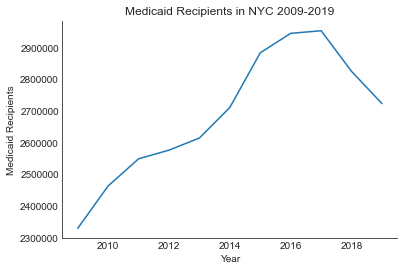

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
mc = sns.lineplot(x='YEAR', y='HINSCAIDWT', data=year_wt)
sns.despine()
mc.set(xlabel='Year', ylabel='Medicaid Recipients', title='Medicaid Recipients in NYC 2009-2019')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

# For Loop to Weight and Plot Survey Variables

## Data Cleaning 

Recoding column values for easier plotting

In [ ]:
df["EMPSTAT"].replace({0: "N/A", 1: "Employed", 2: "Unemployed", 3: "Not In Labor Forace"}, inplace=True)
df['COUNTYICP'].replace({50: 'Bronx', 470: 'Brooklyn', 610: 'Manhattan', 810: 
                         'Queens', 850:'Staten Island'}, inplace=True)
df['RACE'].replace({1: 'White', 2: 'Black', 3: 'American Indian or Alaskan Native', 
                    4: 'Chinese', 5: 'Japanese', 6: 'Other Asian or Pacific Islander', 
                    7: 'Other Race', 8: 'Two major races', 9: 'Three or more major races'}, inplace=True)
df['SEX'].replace({1: 'Male', 2: 'Female'}, inplace=True)
df['CITIZEN'].replace({0: 'US Citizen', 1: 'Born Abroad of Natural Parents', 
                       2: 'Naturalized Citizen', 3: 'Not a Citizen'}, inplace=True)
df['HISPAN'].replace({0: 'Not Hispanic', 1: 'Mexican', 2: 'Puerto Rican', 
                      3: 'Cuban', 4: 'Other', 9: 'Not Reported'}, inplace=True)
df['HINSPUR'].replace({1: 'Insurance not Purchased Directly', 2: 'Insurance Purchased Directly'}, inplace=True)

Creating a dictionary to rename columns for plotting

In [ ]:
dictionary = {'EMPSTAT': 'Employment Status', 'RACE': 'Race', 
              'CITIZEN': 'Citizenship Status', 'SEX': 'Sex', 'COUNTYICP': 'Borough', 
              'HINSPUR': 'Marketplace Insurance', 'HISPAN': 'Hispanic Origin'}

## Plotting Medicaid Population by Attribute

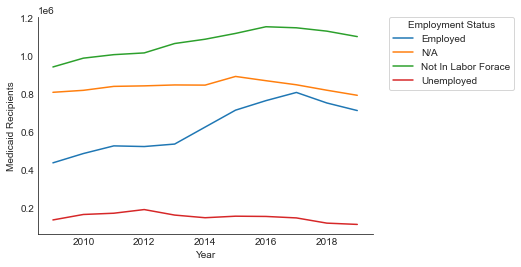

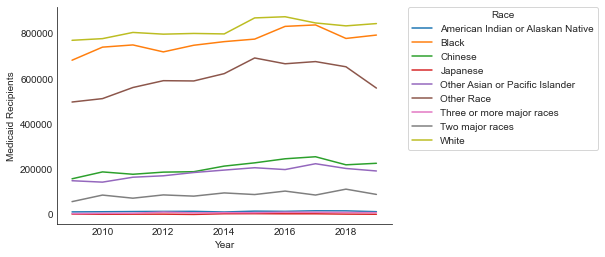

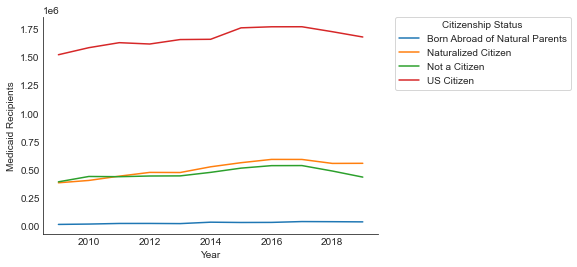

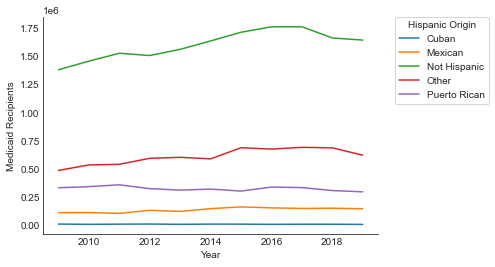

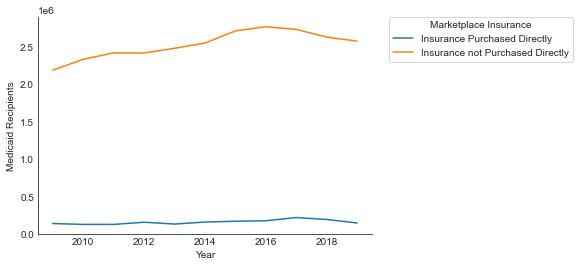

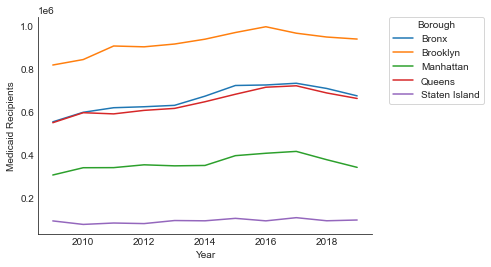

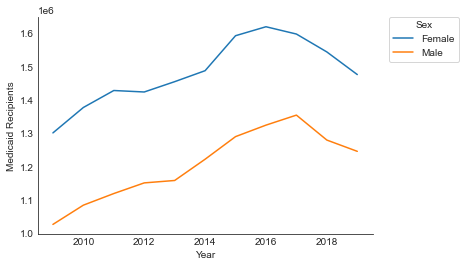

In [46]:
#list for loop
list_plot_var = ['EMPSTAT', 'RACE', 'CITIZEN', 'HISPAN', 'HINSPUR', 'COUNTYICP', 'SEX']

for this_var in list_plot_var:
    this_var_df = df.groupby(['YEAR', this_var], as_index=False).sum()[['YEAR', this_var, 'PERWT']]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    y = sns.lineplot(x='YEAR', y='PERWT', hue=this_var, data=this_var_df)
    sns.despine()
    y.set(xlabel='Year', ylabel='Medicaid Recipients')
    ax.tick_params(axis=u'both', which=u'both',length=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=dictionary[this_var])
    plt.savefig(f'plot_{this_var}.png', bbox_inches='tight')